In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 45.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found 

In [ ]:
import pickle
import librosa
import pandas as pd
import numpy as np
import IPython.display as ipd
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
labels = ["alarm off", "alarm on", "camera off", "camera on", "door close", "door open", "fan decrease", "fan increase", "fan off", "fan on", "fridge off", "fridge on", "lights off", "lights on", "speaker decrease", "speaker increase", "speaker off", "speaker on", "tv off", "tv on"]

In [ ]:
def plot_confusion_matrix(confusion_matrix, labels = labels):
    """
    plots the confusion matrix
    """
    # matrix = confusion_matrix(y_true, y_pred)
    matrix = confusion_matrix
    fig, ax = plt.subplots(figsize=(12,10))
    plt.imshow(matrix)
    ax.set_xticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticks(range(len(labels)));
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="w");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Confusion Matrix");
def plot_loss(history):

    # plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], c ="darkblue")
    plt.plot(history.history['val_loss'], c ="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True, alpha = 0.2)
    plt.show()

def plot_accuracy(history):
    # plt.figure(figsize=(10, 7))
    plt.plot(history.history['accuracy'], c="darkblue")
    plt.plot(history.history['val_accuracy'], c="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True, alpha=0.2)
    plt.show()

In [ ]:
os.chdir("/content/drive/MyDrive/final")

In [ ]:
ls

data13_no_aug.pkl  data_spec_128.pkl    lug13_aug_flat.tflite  model.png
data13.pkl         data_spec.pkl        lug_13.tflite          test/
data1.pkl          data_wio_no_aug.pkl  lug_aug_flat.tflite    train/
data.pkl           data_wio.pkl         lug.tflite


In [ ]:
pickle_path = 'data_wio.pkl'

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

Xtrain = data['Xtrain']
Xtest = data['Xtest']
Xval = data['Xval']
ytrain = data['ytrain']
ytest = data['ytest']
yval = data['yval']

Xtrain.shape,Xtest.shape

((24381, 150, 10, 1), (1068, 150, 10, 1))

In [ ]:
Xval.shape

(1005, 150, 10, 1)

In [ ]:

import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Flatten, Activation, Add
from tensorflow.keras.layers import Dense, Dropout, Softmax, TimeDistributed, LSTM
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, callbacks


# Define the EarlyStopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=12,
    restore_best_weights=True
)

In [ ]:
main_input = Input(shape=(150, 10, 1), name='main_input')

x = Conv2D(16, 3, padding='same', activation='relu', use_bias = False)(main_input)
x = BatchNormalization()(x)

x = Conv2D(16, 2, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(16, 2, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(32, 3, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(128, 2, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)

x = GlobalMaxPooling2D()(x)

x = Dropout(0.1)(x)
x = Dense(32, activation='relu')(x)

intent_output = Dense(20, activation='softmax', name='intent_output', use_bias = False)(x)

model = Model(inputs=main_input, outputs=intent_output)

optim = Adam(learning_rate=1e-3)

model.compile(optimizer = optim, loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 150, 10, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 10, 16)       144       
                                                                 
 batch_normalization_5 (Batc  (None, 150, 10, 16)      64        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 10, 16)       1024      
                                                                 
 batch_normalization_6 (Batc  (None, 150, 10, 16)      64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 5, 16)        0   

In [ ]:
history = model.fit(Xtrain,ytrain, validation_data = (Xval,yval), epochs = 80,workers = 6, max_queue_size = 10,use_multiprocessing = True,batch_size=32,callbacks=[early_stopping])

Epoch 1/80
762/762 [==============================] - 15s 8ms/step - loss: 2.8115 - accuracy: 0.1198 - val_loss: 2.2964 - val_accuracy: 0.2647
Epoch 2/80
762/762 [==============================] - 4s 6ms/step - loss: 1.6675 - accuracy: 0.4355 - val_loss: 0.9138 - val_accuracy: 0.6925
Epoch 3/80
762/762 [==============================] - 6s 8ms/step - loss: 0.9716 - accuracy: 0.6713 - val_loss: 0.6142 - val_accuracy: 0.8030
Epoch 4/80
762/762 [==============================] - 6s 8ms/step - loss: 0.7204 - accuracy: 0.7615 - val_loss: 0.5397 - val_accuracy: 0.8328
Epoch 5/80
762/762 [==============================] - 4s 6ms/step - loss: 0.6102 - accuracy: 0.7989 - val_loss: 0.5588 - val_accuracy: 0.8358
Epoch 6/80
762/762 [==============================] - 5s 7ms/step - loss: 0.5510 - accuracy: 0.8191 - val_loss: 0.4730 - val_accuracy: 0.8607
Epoch 7/80
762/762 [==============================] - 7s 9ms/step - loss: 0.4845 - accuracy: 0.8399 - val_loss: 0.4794 - val_accuracy: 0.8597
Epoch

In [ ]:
model.evaluate(Xtest,ytest)

34/34 [==============================] - 0s 7ms/step - loss: 0.7136 - accuracy: 0.8352


[0.7136021852493286, 0.8352059721946716]

In [ ]:
loss, accuracy = model.evaluate(Xtest, ytest)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

34/34 [==============================] - 0s 6ms/step - loss: 0.7136 - accuracy: 0.8352
Validation Loss: 0.7136021852493286
Validation Accuracy: 0.8352059721946716


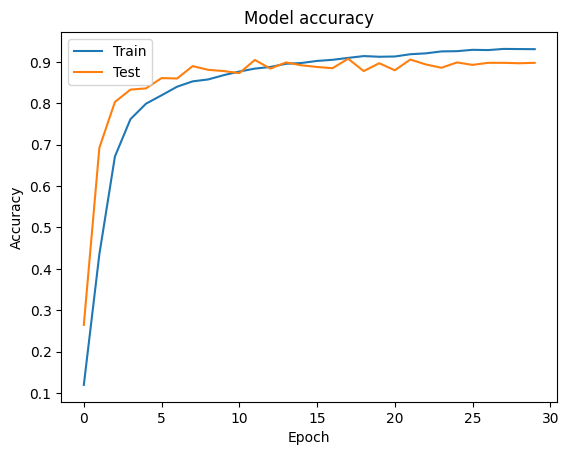

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

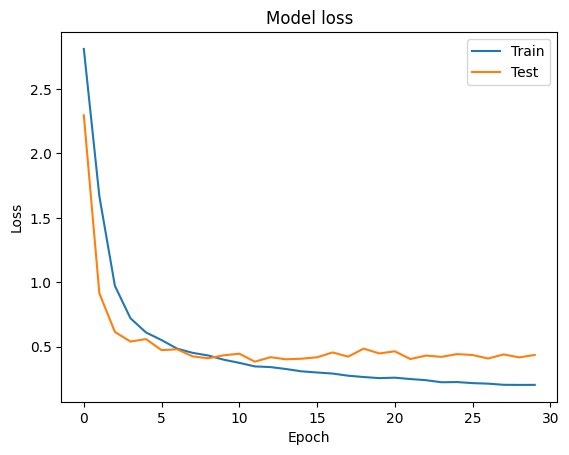

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(Xtest)
# y_pred.shape

y_pred = np.argmax(y_pred, axis=1)
y_true = ytest

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

34/34 [==============================] - 0s 2ms/step


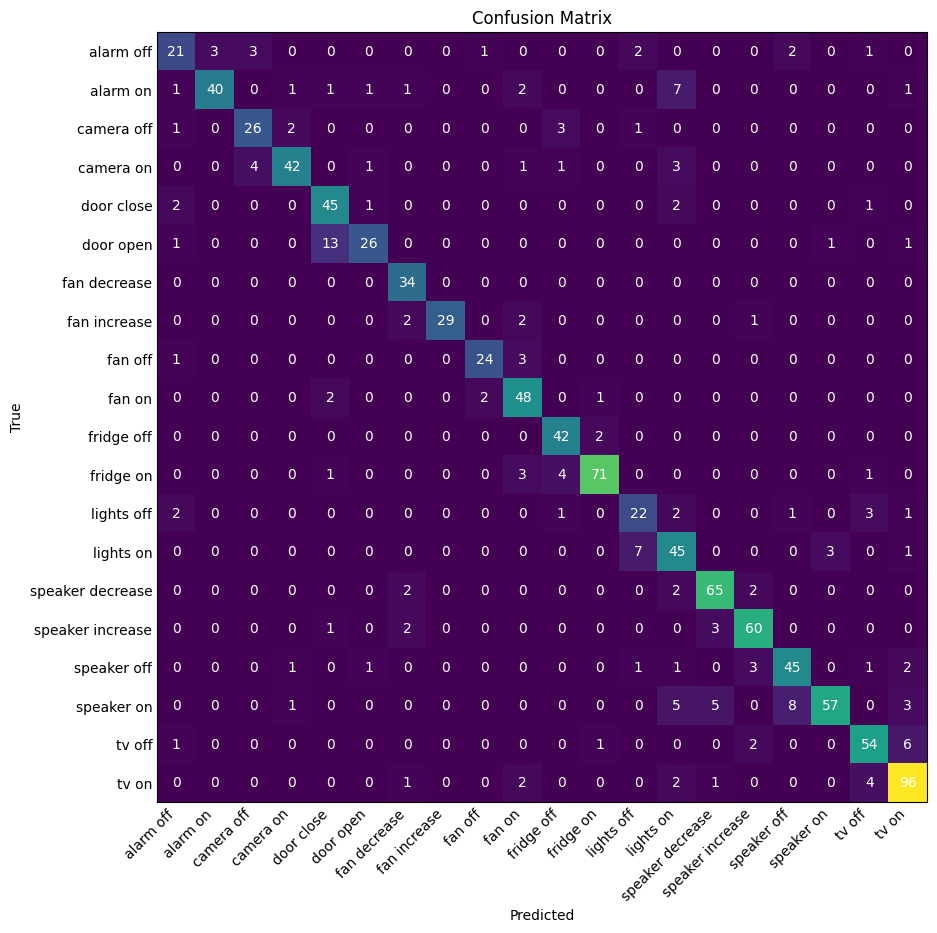

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
model.save("lug_wio.h5")

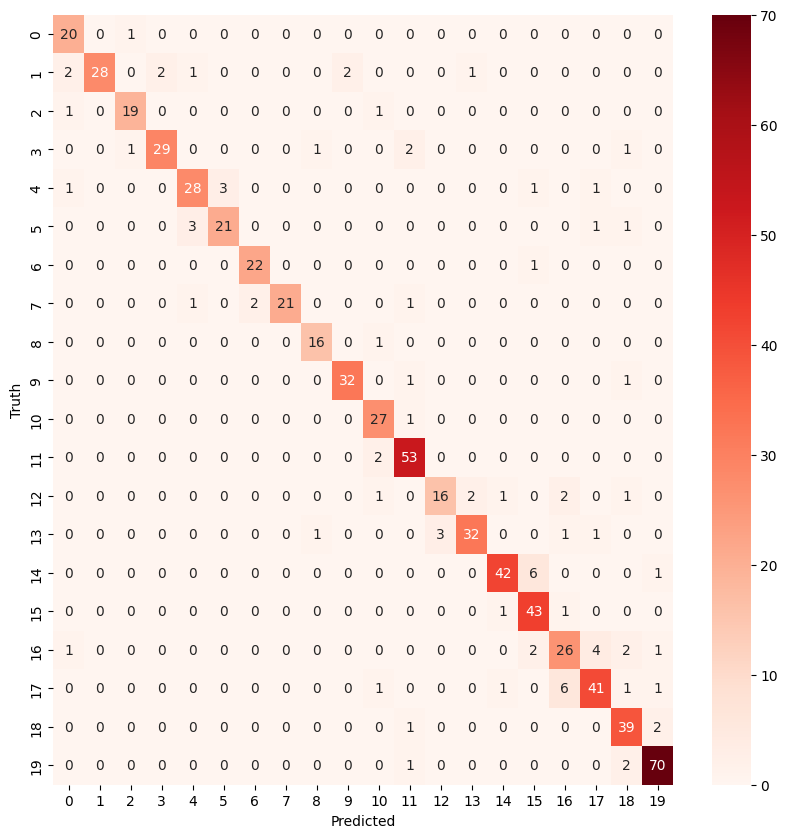

In [ ]:

import seaborn as sns
plt.figure(figsize=(10, 10))

# # Plot the confusion matrix
sns.heatmap(cm, annot=True,fmt="d",cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## allow bias

In [ ]:
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dropout, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

main_input = Input(shape=(150, 10, 1), name='main_input')

x = Conv2D(16, 3, padding='same', activation='relu')(main_input)
x = BatchNormalization()(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)

x = GlobalMaxPooling2D()(x)

x = Dropout(0.1)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)

intent_output = Dense(20, activation='softmax', name='intent_output')(x)

model = Model(inputs=main_input, outputs=intent_output)

optim = Adam(learning_rate=1e-3)

model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 150, 10, 1)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 150, 10, 16)       160       
                                                                 
 batch_normalization_10 (Bat  (None, 150, 10, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 150, 10, 16)       1040      
                                                                 
 batch_normalization_11 (Bat  (None, 150, 10, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 5, 16)        0   

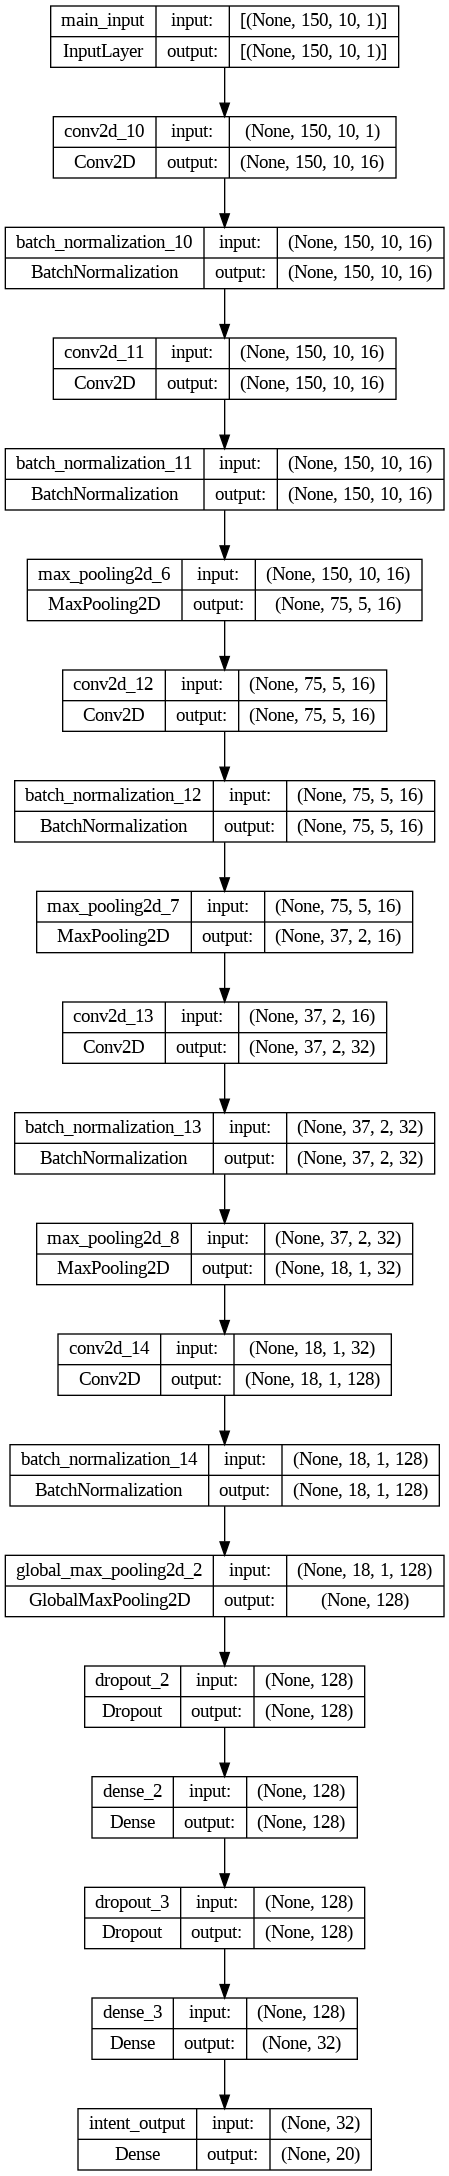

In [ ]:
tf.keras.utils.plot_model(model,show_shapes= True)

In [ ]:
history = model.fit(Xtrain,ytrain, validation_data = (Xval,yval), epochs = 80,workers = 6, max_queue_size = 10,use_multiprocessing = True,batch_size=32,callbacks=[early_stopping])

Epoch 1/80
762/762 [==============================] - 9s 10ms/step - loss: 2.9132 - accuracy: 0.0975 - val_loss: 2.5951 - val_accuracy: 0.1871
Epoch 2/80
762/762 [==============================] - 5s 7ms/step - loss: 2.0933 - accuracy: 0.2926 - val_loss: 1.4591 - val_accuracy: 0.4398
Epoch 3/80
762/762 [==============================] - 5s 7ms/step - loss: 1.4559 - accuracy: 0.4804 - val_loss: 0.9874 - val_accuracy: 0.6468
Epoch 4/80
762/762 [==============================] - 7s 9ms/step - loss: 1.1147 - accuracy: 0.6097 - val_loss: 0.8021 - val_accuracy: 0.7413
Epoch 5/80
762/762 [==============================] - 6s 7ms/step - loss: 0.8930 - accuracy: 0.6937 - val_loss: 0.6622 - val_accuracy: 0.7602
Epoch 6/80
762/762 [==============================] - 5s 7ms/step - loss: 0.7843 - accuracy: 0.7339 - val_loss: 0.5879 - val_accuracy: 0.7990
Epoch 7/80
762/762 [==============================] - 7s 10ms/step - loss: 0.6896 - accuracy: 0.7703 - val_loss: 0.5562 - val_accuracy: 0.8149
Epoc

In [ ]:
loss, accuracy = model.evaluate(Xtest, ytest)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

34/34 [==============================] - 0s 8ms/step - loss: 0.5252 - accuracy: 0.8708
Validation Loss: 0.5252166390419006
Validation Accuracy: 0.8707864880561829


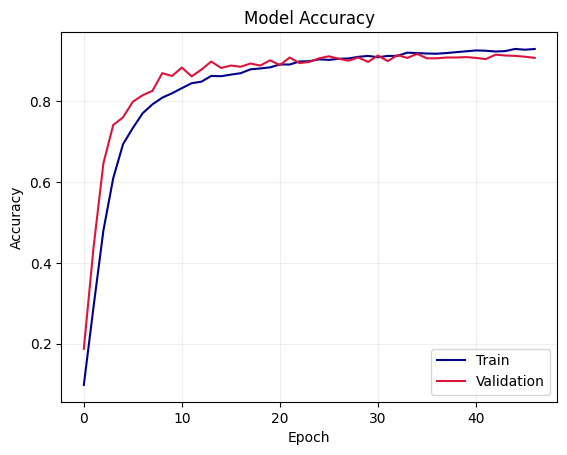

In [ ]:
plot_accuracy(history)

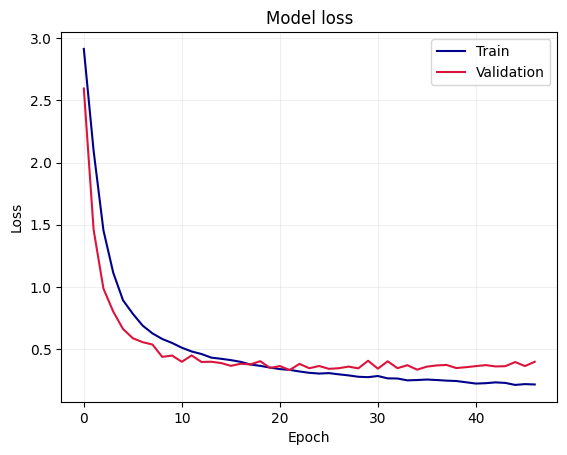

In [ ]:
plot_loss(history)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(Xtest)
# y_pred.shape

y_pred = np.argmax(y_pred, axis=1)
y_true = ytest

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

34/34 [==============================] - 0s 2ms/step


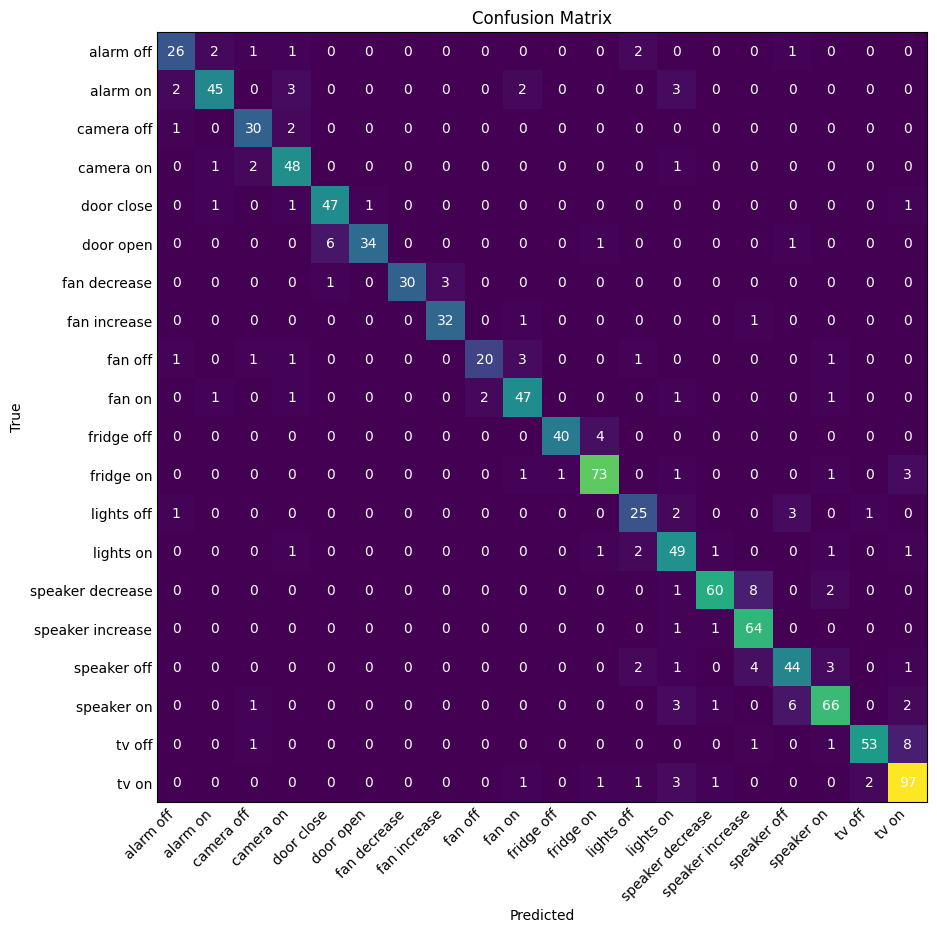

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
model.save("/content/drive/MyDrive/models_lug/lug_wio.h5")

In [ ]:
# tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = tf_lite_converter.convert()

In [ ]:
# tflite_model_name = "lug.tflite"
# open(tflite_model_name, "wb").write(tflite_model)

188964

## allow bias

In [ ]:
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dropout, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

main_input = Input(shape=(150, 10, 1), name='main_input')

x = Conv2D(16, 3, padding='same', activation='relu')(main_input)
x = BatchNormalization()(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dropout(0.3)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

intent_output = Dense(20, activation='softmax', name='intent_output')(x)

model = Model(inputs=main_input, outputs=intent_output)

optim = Adam(learning_rate=1e-3)

model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 150, 10, 1)]      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 150, 10, 16)       160       
                                                                 
 batch_normalization_20 (Bat  (None, 150, 10, 16)      64        
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 150, 10, 16)       1040      
                                                                 
 batch_normalization_21 (Bat  (None, 150, 10, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 5, 16)        0   

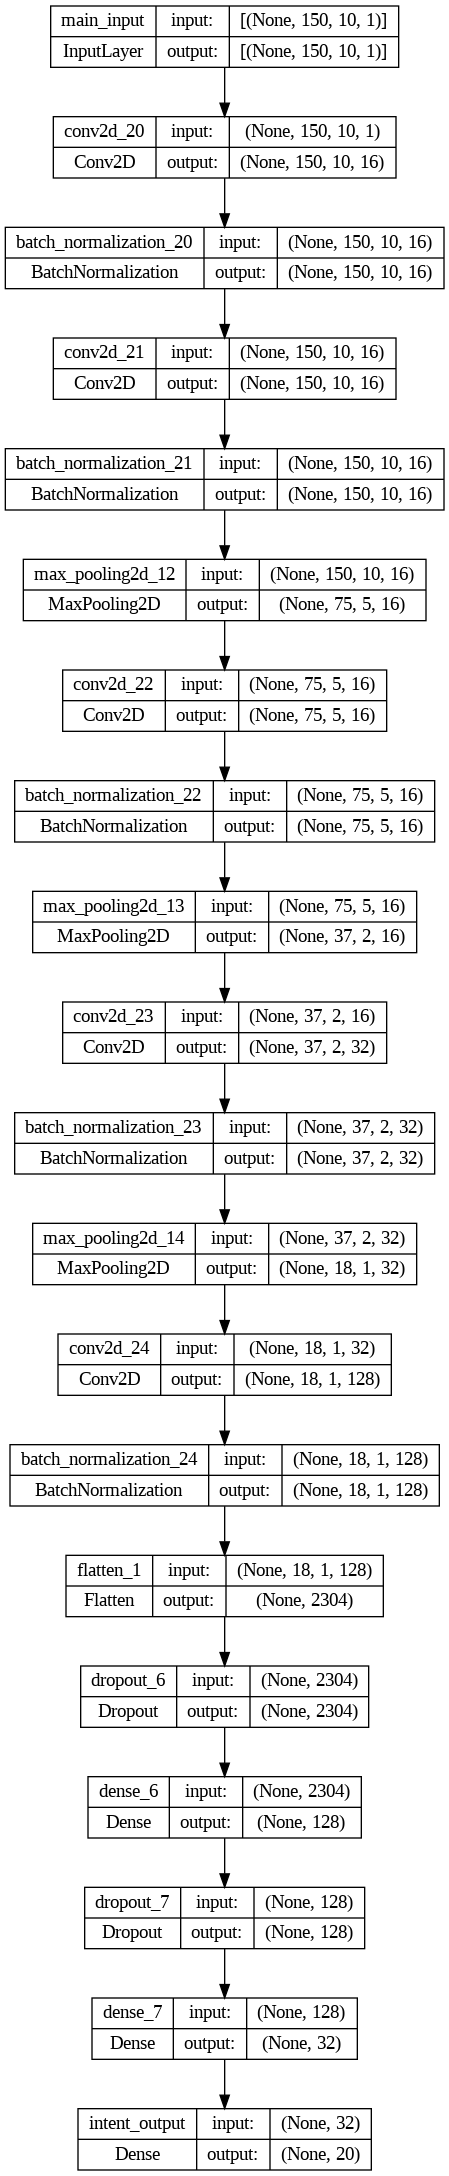

In [ ]:
tf.keras.utils.plot_model(model,show_shapes= True)

In [ ]:
history = model.fit(Xtrain,ytrain, validation_data = (Xval,yval), epochs = 80,workers = 6, max_queue_size = 10,use_multiprocessing = True,batch_size=32,callbacks=[early_stopping])

Epoch 1/80
762/762 [==============================] - 8s 9ms/step - loss: 2.9499 - accuracy: 0.0984 - val_loss: 2.7937 - val_accuracy: 0.1313
Epoch 2/80
762/762 [==============================] - 5s 6ms/step - loss: 2.6036 - accuracy: 0.1760 - val_loss: 2.3617 - val_accuracy: 0.2090
Epoch 3/80
762/762 [==============================] - 5s 6ms/step - loss: 2.1730 - accuracy: 0.2786 - val_loss: 1.6939 - val_accuracy: 0.3881
Epoch 4/80
762/762 [==============================] - 6s 8ms/step - loss: 1.7662 - accuracy: 0.3915 - val_loss: 1.3481 - val_accuracy: 0.5204
Epoch 5/80
762/762 [==============================] - 6s 8ms/step - loss: 1.5031 - accuracy: 0.4724 - val_loss: 1.1224 - val_accuracy: 0.6060
Epoch 6/80
762/762 [==============================] - 5s 6ms/step - loss: 1.2876 - accuracy: 0.5500 - val_loss: 0.9563 - val_accuracy: 0.6736
Epoch 7/80
762/762 [==============================] - 5s 7ms/step - loss: 1.1293 - accuracy: 0.6066 - val_loss: 0.8455 - val_accuracy: 0.7244
Epoch 

In [ ]:
loss, accuracy = model.evaluate(Xtest, ytest)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

34/34 [==============================] - 0s 3ms/step - loss: 0.8250 - accuracy: 0.8202
Validation Loss: 0.8249503970146179
Validation Accuracy: 0.8202247023582458


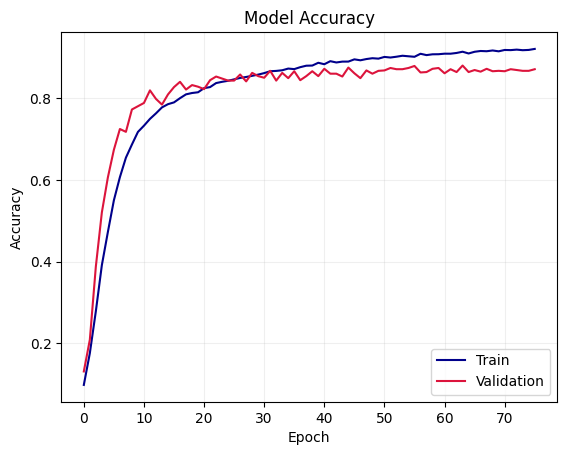

In [ ]:
plot_accuracy(history)

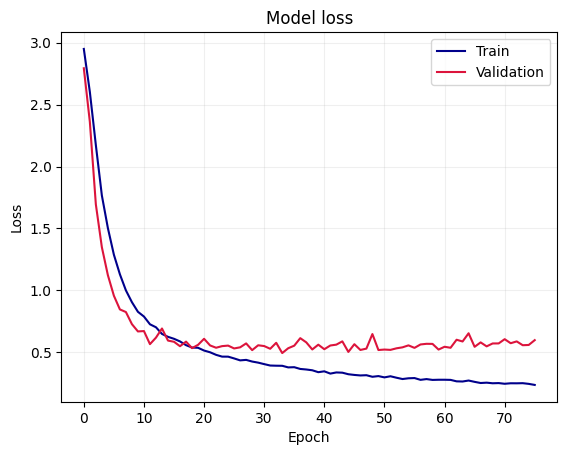

In [ ]:
plot_loss(history)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(Xtest)
# y_pred.shape

y_pred = np.argmax(y_pred, axis=1)
y_true = ytest

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

34/34 [==============================] - 0s 3ms/step


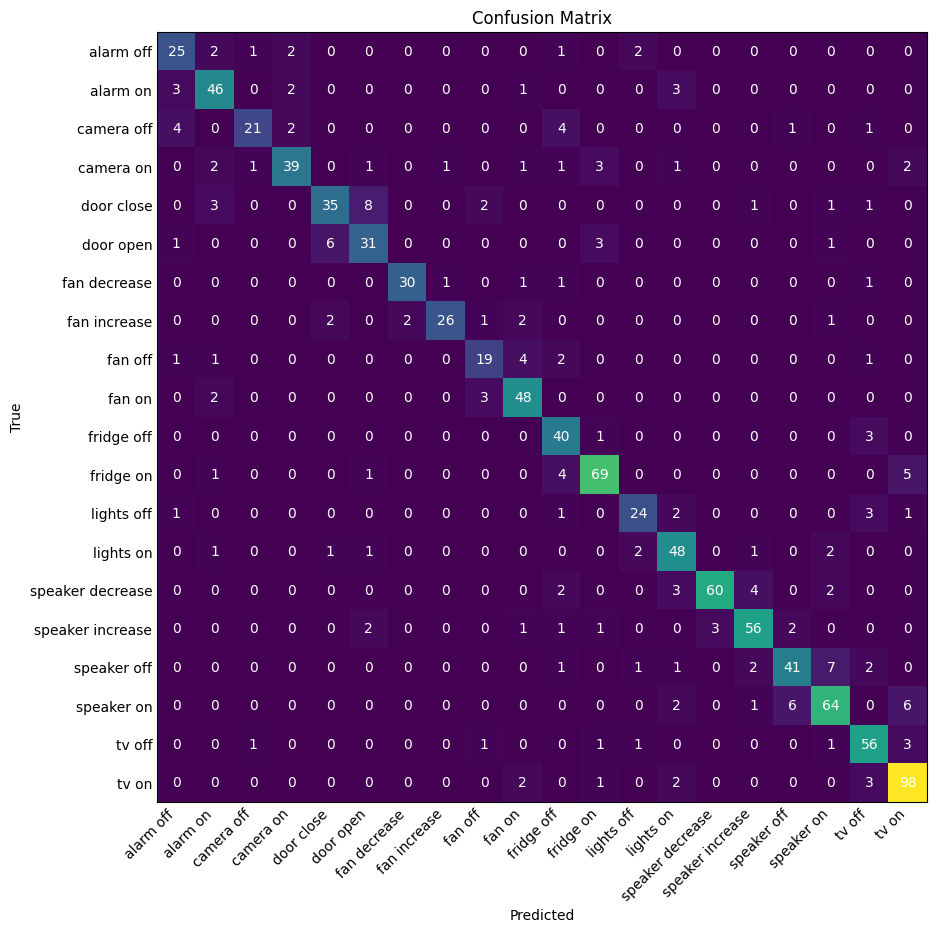

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
model.save("/content/drive/MyDrive/models_lug/lug_wio_flat.h5")

In [ ]:
# tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = tf_lite_converter.convert()

In [ ]:
# tflite_model_name = "lug_aug_flat.tflite"
# open(tflite_model_name, "wb").write(tflite_model)

1106400